# Análisis ligero sobre los datos raw - Airbnb Listing & Reviews

En esta libreta jupyter comprendo la forma de los datos raw descargados desde la plataforma de datos abiertos de Airbnb.

## Importación de los datasets

In [11]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

csv_path_listing = Path("../../data/raw/listings.csv") 
listings = pd.read_csv(csv_path_listing)

csv_path_reviews = Path("../../data/raw/reviews.csv") 
reviews = pd.read_csv(csv_path_reviews)

## listings.csv

In [12]:
print("Listings shape:", listings.shape)

Listings shape: (7844, 79)


In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7844 non-null   int64  
 1   listing_url                                   7844 non-null   object 
 2   scrape_id                                     7844 non-null   int64  
 3   last_scraped                                  7844 non-null   object 
 4   source                                        7844 non-null   object 
 5   name                                          7844 non-null   object 
 6   description                                   7668 non-null   object 
 7   neighborhood_overview                         3277 non-null   object 
 8   picture_url                                   7844 non-null   object 
 9   host_id                                       7844 non-null   i

En este caso podemos ver patrones extraños en el csv como la columna "calendar_updated" estando completamente vacía. Además, existen otras columnas con un porcentaje de valores nulos por encima del 50%.

Este hecho nos pone en situación sobre la calidad de los datos con los que estamos tratanto. 

In [20]:
(
    listings.isna()
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

calendar_updated               1.000000
host_neighbourhood             0.777664
neighborhood_overview          0.582228
neighbourhood                  0.582228
host_about                     0.462392
license                        0.422106
host_location                  0.274987
review_scores_location         0.124681
review_scores_value            0.124681
review_scores_checkin          0.124681
review_scores_communication    0.124681
review_scores_accuracy         0.124681
last_review                    0.124554
review_scores_rating           0.124554
reviews_per_month              0.124554
dtype: float64

In [21]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,https://www.airbnb.com/rooms/48154,20250923203019,2025-09-24,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,https://a0.muscache.com/pictures/1109085/9c0d4...,219476,https://www.airbnb.com/users/show/219476,Antonio,2010-09-01,Spain,Un saludo a todos. Espero que os pongáis en co...,within a few hours,100%,96%,f,https://a0.muscache.com/im/users/219476/profil...,https://a0.muscache.com/im/users/219476/profil...,La Saïdia,4.0,4.0,"['email', 'phone']",t,t,"Valencia, Spain",MORVEDRE,LA SAIDIA,39.48375,-0.37502,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""TV"", ""Host greets you"", ""Essentials"", ""Washe...",$83.00,3,25,2.0,4.0,10.0,25.0,3.0,23.5,NaN,t,10,34,60,150,2025-09-24,197,26,1,69,30,156,12948.0,2010-10-12,2025-09-15,4.61,4.68,4.63,4.85,4.80,4.52,4.52,VT-41540-V,f,4,4,0,0,1.08
1,137143,https://www.airbnb.com/rooms/137143,20250923203019,2025-09-24,city scrape,PENTHOUSE ON FRONT LINE BEACH,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,670775,https://www.airbnb.com/users/show/670775,Maria De La Piedad,2011-06-06,"Valencia, Spain",Hola a todos! Mi nombre es Piedad Villena y es...,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/26792...,https://a0.muscache.com/im/pictures/user/26792...,Camins al Grau,5.0,5.0,"['email', 'phone']",t,t,NaN,EL SALER,POBLATS DEL SUD,39.36335,-0.31932,Entire rental unit,Entire home/apt,7,1.5,1.5 baths,1.0,14.0,"[""TV"", ""Wifi"", ""Pool"", ""Elevator"", ""Washer"", ""...",$390.00,10,170,10.0,10.0,170.0,170.0,10.0,170.0,NaN,t,4,16,20,20,2025-09-24,1,0,0,20,0,0,0.0,2013-07-02,2013-07-02,0.00,5.00,5.00,5.00,5.00,4.00,4.00,VT32745V,f,5,5,0,0,0.01
2,149715,https://www.airbnb.com/rooms/149715,20250923203019,2025-09-24,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 4 bathr...,"Surrounded by historic houses, authentic res...",https://a0.muscache.com/pictures/808b4883-c57f...,5947,https://www.airbnb.com/users/show/5947,Susana Barbara,2009-01-03,"Valencia, Spain",I’ve been traveling since I was 15. I moved ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Poblados Marítimos,1.0,1.0,['phone'],t,t,"Valencia, Valencian Community, Spain",CABANYAL-CANYAMELAR,POBLATS MARITIMS,39.46746,-0.32813,Entire home,Entire home/apt,10,4.0,4 baths,5.0,7.0,"[""Hot water kettle"", ""Private patio or balcony...",$245.00,2,9,1.0,3.0,9.0,9.0,2.1,9.0,NaN,t,9,27,49,287,2025-09-24

In [18]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## reviews.csv

El csv de reseñas es más grande aunque cuente con menos columnas.

In [13]:
print("Reviews shape:", reviews.shape)

Reviews shape: (405030, 6)


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405030 entries, 0 to 405029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     405030 non-null  int64 
 1   id             405030 non-null  int64 
 2   date           405030 non-null  object
 3   reviewer_id    405030 non-null  int64 
 4   reviewer_name  405029 non-null  object
 5   comments       405009 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


Es reseñable como la única columna de reseñas que contiene valores nulos es "comments". Esto se debe a la característica intrínseca de las reseñas de AirBnb donde es posible realizar una calificación numérica en forma de estrellas (0-5) sin necesidad de aportar un comentario escrito.

In [17]:
(
    reviews.isna()
    .mean()
    .sort_values(ascending=False)
    .head(15)
)


comments         0.000052
reviewer_name    0.000002
id               0.000000
listing_id       0.000000
reviewer_id      0.000000
date             0.000000
dtype: float64

In [ ]:
reviews.head()

In [10]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

## Representaciones gráficas

In [25]:
listings["price"].head()

0     $83.00
1    $390.00
2    $245.00
3    $124.00
4    $137.00
Name: price, dtype: object

Además, podemos comprobar como la distribución de precios es similar en la mayoría de alojamientos. Solo encontramos ligeros outliers más caros

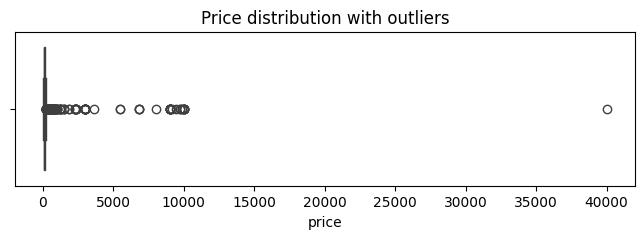

In [ ]:
price_numeric = (
    listings["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)


plt.figure(figsize=(8, 2))
sns.boxplot(x=price_numeric)
plt.title("Distribución de precios con outliers")
plt.show()

Puesto que los outliers solo se encuentran si nos orientamos a precios más elevados, utilizaremos cuantiles para analizar de una manera más enfocada los valores comunes.

In [38]:
# percentiles
p9 = price_numeric.quantile(0.9)

# filtrar para visualización
price_no_outliers = price_numeric[
    (price_numeric <= p9)
]
p9

np.float64(198.0)

En este caso observamos como los precios se aglutinan alrededor de los 100$ por noche.

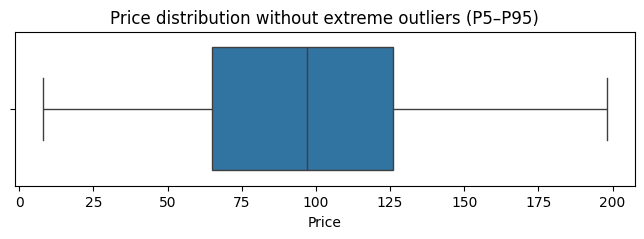

In [39]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=price_no_outliers)
plt.xlabel("Price")
plt.title("Price distribution without extreme outliers (P5–P95)")
plt.show()

Podemos ver la evidencia de alojamientos turísticos agrupados en las zonas con mayor valor turístico de la ciudad. Siendo estas, la costa (POBLATS MARITIMS) y el centro histórico (CIUTAT VELLA).

In [27]:
listings["neighbourhood_group_cleansed"].value_counts().head(10)


neighbourhood_group_cleansed
POBLATS MARITIMS    1471
CIUTAT VELLA        1284
QUATRE CARRERES      814
CAMINS AL GRAU       729
L'EIXAMPLE           686
EXTRAMURS            637
ALGIROS              341
LA SAIDIA            329
JESUS                282
L'OLIVERETA          233
Name: count, dtype: int64